In [42]:
import os
import dotenv

import pandas as pd

from connection import get_db_engine

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [43]:
liradb_config = {
    "DB_HOST": 'liradb.compute.dtu.dk',
    "DB_PORT": 5435,
    "DB_USER": 'guest',
    "DB_PASS": 'V2GjxQVn',
    'DB_NAME': 'postgres',
}
liradbdev_config = {
    "DB_HOST": 'liradbdev.compute.dtu.dk',
    "DB_PORT": 5432,
    "DB_USER": 'guest',
    "DB_PASS": 'AvpF7r8b',
    'DB_NAME': 'postgres',
}
ssh_config = {
    'SSH_HOST': os.environ.get("SSH_HOST"),
    'SSH_USER': os.environ.get("SSH_USER"),
    'SSH_PASS': os.environ.get("SSH_PASS"),
}

In [44]:
engine = get_db_engine(ssh_config, liradb_config)

2022-02-22 17:40:07,846| ERROR   | Password is required for key /home/silas/.ssh/id_ed25519


Connecting to the SSH Tunnel...
Success


TypeError: create_engine() takes 1 positional argument but 2 were given

In [37]:
query: str = """
    select *
    from "Devices"
    limit 10;
"""
with engine.connect() as conn:
    df = pd.read_sql(query, conn)
df

,DeviceId,Created_Date,Updated_Date,FK_SourceType
0,8051a60b-84f8-4c7e-9e6a-cd57bcf52ebe,2020-04-30 09:14:06.484286+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
1,9491599b-0e08-438c-a7cb-39b10f34b2de,2020-04-30 10:23:43.280443+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
2,6513ab9d-66f0-4701-a2fb-a54dbaf12151,2020-04-30 10:44:15.016908+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
3,bded9c90-025e-460a-9c30-b65a29d07b91,2020-04-30 22:10:33.815965+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
4,eadc9490-e9de-4219-ba29-03472c74cefd,2020-05-04 15:36:17.025234+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
5,28fd50ce-496f-4723-942d-61877eabe1e4,2020-05-06 16:35:48.115170+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
6,187c70cc-4eff-4307-8157-ac0fa0102f43,2020-08-24 11:47:24.545230+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
7,0cb38d9f-3601-4179-b5ef-403a999c9021,2020-05-28 00:00:00+00:00,2020-05-28 00:00:00+00:00,dae3115a-7bff-434c-8a77-e6672ebc7599
8,85d44a66-4ecb-4fdc-91be-0a18b2d7ebdb,2020-10-05 22:13:15.315638+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1
9,ca3cfc39-7b69-48e0-8046-6e9a0bc838aa,2020-10-05 22:22:30.755832+00:00,0001-01-01 00:00:00+00:00,e9445538-3381-414c-a302-2b33b70d72b1


In [30]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_theme(
    # context="talk",
    # style="white",
    rc={"font.sans-serif": "Arial"},
)


In [126]:
def load_data(path):
    data = loadmat(path)
    data.pop("__header__")
    data.pop("__version__")
    data.pop("__globals__")
    data = {key: np.squeeze(val) for key, val in data.items()}
    return pd.DataFrame.from_dict(data)

In [162]:
df = load_data("C:\\Users\s174433\Documents\LiRADBstatic_v0.1\Matlab\output\cph1_traccon_taskID_8040_pass_2.mat")
df["traccon"] = df["traccon"] - 160.
df["traccon"] = df["traccon"].astype(float)

df

,alt,direction,distance,lat,lon,timestamp,traccon
0,35.599913,VH,34382.122510,55.710902,12.588330,6.378681e+10,8.0
1,35.650285,VH,34383.508036,55.710887,12.588344,6.378681e+10,10.0
2,35.685041,VH,34384.913171,55.710877,12.588354,6.378681e+10,10.0
3,35.693477,VH,34386.310133,55.710874,12.588356,6.378681e+10,8.0
4,35.692019,VH,34389.107921,55.710877,12.588354,6.378681e+10,6.0
...,...,...,...,...,...,...,...
23483,47.479003,VH,56814.382183,55.722202,12.554946,6.378682e+10,-2.0
23484,47.373752,VH,56817.881688,55.722181,12.554956,6.378682e+10,-2.0
23485,47.317214,VH,56819.631906,55.722171,12.554961,6.378682e+10,-2.0
23486,47.293947,VH,56820.332108,55.722167,12.554963,6.378682e+10,-2.0


<AxesSubplot:>

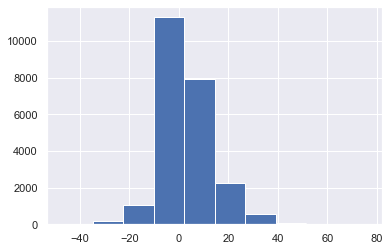

In [157]:
df["traccon"].hist()

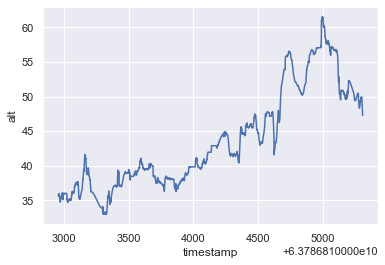

In [185]:
ax = sns.lineplot(
    data=df.sort_values("timestamp"),
    x="timestamp",
    y="alt",
    # hue="alt",
)

In [155]:
import plotly.express as px

fig = px.line_geo(
    df,
    lat="lat",
    lon="lon",
    color="traccon",
    scope="europe"
)
fig.update_geos(fitbounds="locations")

fig.show()

In [186]:
m = folium.Map(
    location=df[["lat", "lon"]].mean(),
    zoom_start=11,
)
folium.PolyLine(
    locations=df[["lat", "lon"]],
).add_to(m)
folium.Marker(
    location=list(np.squeeze(df[df["timestamp"] == df["timestamp"].min()][["lat", "lon"]].values)),
    popup="Start location",
    icon=folium.Icon(color="green", icon="info-sign"),
).add_to(m)
folium.Marker(
    location=list(np.squeeze(df[df["timestamp"] == df["timestamp"].max()][["lat", "lon"]].values)),
    popup="End location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
m